In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# accessing data from google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Loading the dataset
data = pd.read_csv('/content/drive/MyDrive/AIP Team 5/dataset/temp.csv')

# first 5 samples from dataset
data.head()

,comment,label,processed_text
0,Mohammad harun he is an awesome guy very info...,Postive,Mohammad harun awesome guy informative helpful...
1,amazing guy gaurav was so patience and kind ...,Postive,amazing guy gaurav patience kind helped start ...
2,Gaurav was very knowledgeable and very helpful...,Postive,Gaurav knowledgeable helpful knows situation a...
3,I called them regarding my flight cancellation...,Postive,I called regarding flight cancellation narrate...
4,VERY GOOD SERVICE BY GAURAV LOHAT SERVED AS SO...,Postive,VERY GOOD SERVICE BY GAURAV LOHAT SERVED AS SO...


In [ ]:
# converting the text into lowercase
data['processed_text'] = data['processed_text'].str.lower()

In [ ]:
data['comment_len'] = data['comment'].str.split().str.len()
data['processed_text_len'] = data['processed_text'].str.split().str.len()

In [ ]:
# checking if there is any null values
data.isnull().sum()

comment                0
label                  0
processed_text        56
comment_len            0
processed_text_len    56
dtype: int64

In [ ]:
# dropping null values
data.dropna(inplace=True)

# Comment Length Analytics

In [ ]:
# Separating positive and negative comments to perform analytics on it
df_pos = data[data['label']=='Postive']
df_neg = data[data['label']=='Negative']

In [ ]:
# statistical properties of positive comments
dfp = df_pos['processed_text_len'].describe()
dfp

count    267081.000000
mean         17.956788
std          22.078519
min           1.000000
25%           7.000000
50%          12.000000
75%          21.000000
max        1075.000000
Name: processed_text_len, dtype: float64

In [ ]:
# statistical properties of negative comments
dfn = df_neg['processed_text_len'].describe()
dfn

count    37184.000000
mean        45.845256
std         57.430611
min          1.000000
25%         11.000000
50%         28.000000
75%         58.000000
max       1428.000000
Name: processed_text_len, dtype: float64

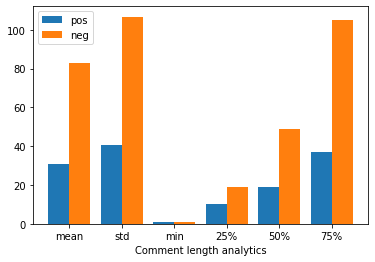

In [ ]:
# plotting the comparison between positive and negative comment length
X_axis = dfp.keys()[1:-1]
y_pos = dfp.values[1:-1]
y_neg = dfn.values[1:-1]

X = np.arange(len(X_axis))
  
plt.bar(X - 0.2, y_pos, 0.4, label = 'pos')
plt.bar(X + 0.2, y_neg, 0.4, label = 'neg')
  
plt.xticks(X, X_axis)
plt.xlabel("Comment length analytics")
plt.legend()
plt.show()

# Correcting the target using huggingface sentiment analysis API

In [ ]:
neg_comment = df_neg
neg_comment.reset_index(inplace=True)
neg_comment.head()

,index,comment,label,processed_text,comment_len,processed_text_len
0,37,I have had nothing but trouble dealing with th...,Negative,i nothing trouble dealing company pandemic we ...,192,101.0
1,63,Ankush was a great help and he explained me ea...,Negative,ankush great help explained everything clearly...,26,14.0
2,186,Scaaaam don t want to give me my refund and th...,Negative,scaaaam want give refund orgy received refund ...,53,30.0
3,190,ASAP Ticket is a SCAM They have refused to ...,Negative,asap ticket scam they refused give money back ...,74,36.0
4,199,So far so good for ASAP Tickets Team especial...,Negative,so far good asap tickets team especially benja...,21,14.0


In [ ]:
# lets remove all the comments with length greater than 300 tokens 
# as huggingface api does not support that big review

neg_comment = neg_comment[neg_comment['processed_text_len']<300]

In [ ]:
!pip install -q transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 55.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 24.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 102.5 MB/s eta 0:00:00


In [ ]:
# using sentiment analysis tools from the huggingface transformer
from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [ ]:
# finding sentiment for all the negative comments
temp = []
count = 0
for pt in neg_comment['processed_text']:
  temp.append(sentiment_pipeline(pt)[0]['label'])

  count += 1
  if count%5000 == 0:
    print(count)

5000
10000
15000
20000
25000
30000
35000


In [ ]:
# adding result of huggingface prediction
neg_comment['huggingface_prediction'] = temp

In [ ]:
# negative comment predicted as positive and as negative

neg_comment_pred_pos = neg_comment[neg_comment['huggingface_prediction']=='POSITIVE']
neg_comment_pred_neg = neg_comment[neg_comment['huggingface_prediction']=='NEGATIVE']

In [ ]:
# reseting the index
neg_comment_pred_neg.reset_index(inplace=True)
neg_comment_pred_pos.reset_index(inplace=True)

In [ ]:
# neg_comment_pred_neg.drop(['huggingface_prediction'],axis=1,inplace=True)
# neg_comment_pred_pos.drop(['huggingface_prediction'],axis=1,inplace=True)

In [ ]:
neg_comment_pred_pos['label'] = neg_comment_pred_pos['label'].apply(lambda x : 1)

In [ ]:
neg_comment_pred_pos

In [ ]:
neg_comment_pred_neg.drop(['level_0','index'],axis=1,inplace=True)
neg_comment_pred_pos.drop(['level_0','index'],axis=1,inplace=True)

In [ ]:
neg_comment_pred_neg.head()

In [ ]:
pos_comment = data[data['label']==1]

In [ ]:
pos_comment.head()

In [ ]:
new_data = pd.concat([pos_comment,neg_comment_pred_pos,neg_comment_pred_neg])
new_data.head()

In [ ]:
new_data

In [ ]:
new_data['label'].value_counts()

In [ ]:
new_data.to_csv('/content/drive/MyDrive/AIP Team 5/new_data.csv',index=False)

In [ ]:
data.head()